In [1]:
import pickle
import scipy.stats as stats
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from collections import defaultdict

from scipy.stats import chi2_contingency

def chi_sq_test(detected, converged):
    unique_labels = list(set(detected + converged))
    freq1_dict = defaultdict(int)
    freq2_dict = defaultdict(int)
    for i in range(len(detected)):
        freq1_dict[detected[i]] += 1
        freq2_dict[converged[i]] += 1
        
    freq1_list = []
    freq2_list = []
    for label in unique_labels:
        freq1_list.append(freq1_dict[label])
        freq2_list.append(freq2_dict[label])
        
    table = [freq1_list, freq2_list]
    stat, p, dof, expected = chi2_contingency(table)

    return p

In [9]:
def get_ONS_rejections_for_plots(spaces):
    All_statistics_rejections = []
    for i in range(2, 10):
        rejections_list = []
        for space in spaces: 
            Allfiles = os.listdir("../../Output/All8NetworkStatisticsAtConvergence/" + space)
            num_count = 0
            num_rejections = 0
            for f in Allfiles:
                if f == ".ipynb_checkpoints":
                    pass
                else:
                    num_count +=1
                    pickleFile = "../../Output/All8NetworkStatisticsAtConvergence/" + space + f
                    pickle_in = open(pickleFile,"rb")
                    savedList = pickle.load(pickle_in)
                    if i == 2 or i == 3 or i == 6 or i == 7:
                        pval = savedList[i][4]
                    else: # for these network statistics, we would do a chi-sq test instead of KS test.
                        detected = savedList[9][1]
                        converged = savedList[9][2]
                        pval = chi_sq_test(detected, converged)

                    if pval < 0.05:
                        num_rejections += 1
            
            rejections_list.append(num_rejections/num_count*100)
        All_statistics_rejections.append(rejections_list)
        
    return All_statistics_rejections

In [10]:
spaces = ["SimpleStub/", "SimpleVertex/", "LoopyOnlyStub/", "LoopyOnlyVertex/", "MultiLoopyStub/",
          "MultiLoopyVertex/", "MultiOnlyStub/", "MultiOnlyVertex/"]

All_statistics_rejections = get_ONS_rejections_for_plots(spaces)

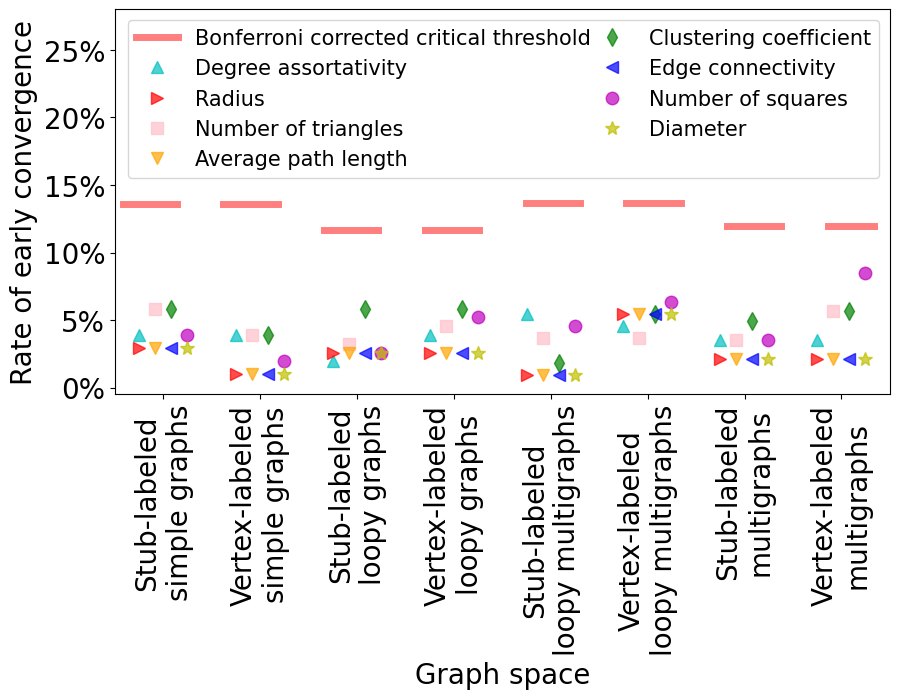

In [11]:
plt.figure(figsize=(10, 5))

spaces_names = ["Stub-labeled\nsimple graphs", "Vertex-labeled\nsimple graphs", "Stub-labeled\nloopy graphs", 
          "Vertex-labeled\nloopy graphs", "Stub-labeled\nloopy multigraphs", "Vertex-labeled\nloopy multigraphs",
         "Stub-labeled\nmultigraphs", "Vertex-labeled\nmultigraphs"]

spaces = [-0.5, 1.5, 3.5, 5.5, 7.5, 9.5, 11.5, 13.5]
plt.errorbar(spaces, All_statistics_rejections[0], linestyle='None', marker='^', markersize = 9, capsize = 5, label = "Degree assortativity", c = 'c', alpha = 0.7)
plt.errorbar(spaces, All_statistics_rejections[7], linestyle='None', marker='>', markersize = 9, capsize = 5, label = "Radius", c = 'r', alpha = 0.7)

plt.xticks(spaces, spaces_names, rotation="vertical", fontsize = 20)

spaces = [-0.5+0.33, 1.5+0.33, 3.5+0.33, 5.5+0.33, 7.5+0.33, 9.5+0.33, 11.5+0.33, 13.5+0.33]
plt.errorbar(spaces, All_statistics_rejections[4], linestyle='None', marker='s', markersize = 9, capsize = 5, label = "Number of triangles", c = 'pink', alpha = 0.7)
plt.errorbar(spaces, All_statistics_rejections[3], linestyle='None', marker='v', markersize = 9, capsize = 5, label = "Average path length", c = 'orange', alpha = 0.7)

plt.xticks(spaces, spaces_names, rotation="vertical", fontsize = 20)

spaces = [-0.5+0.66, 1.5+0.66, 3.5+0.66, 5.5+0.66, 7.5+0.66, 9.5+0.66, 11.5+0.66, 13.5+0.66]
plt.errorbar(spaces, All_statistics_rejections[1], linestyle='None', marker='d', markersize = 9, capsize = 5, label = "Clustering coefficient", c = 'g', alpha = 0.7)
plt.errorbar(spaces, All_statistics_rejections[6], linestyle='None', marker='<', markersize = 9, capsize = 5, label = "Edge connectivity", c = 'b', alpha = 0.7)

plt.xticks(spaces, spaces_names, rotation="vertical", fontsize = 20)

spaces = [-0.5+0.99, 1.5+0.99, 3.5+0.99, 5.5+0.99, 7.5+0.99, 9.5+0.99, 11.5+0.99, 13.5+0.99]
plt.errorbar(spaces, All_statistics_rejections[5], linestyle='None', marker='o', markersize = 9, capsize = 5, label = "Number of squares", c = 'm', alpha = 0.7)
plt.errorbar(spaces, All_statistics_rejections[2], linestyle='None', marker='*', markersize = 10, capsize = 5, label = "Diameter", c = 'y', alpha = 0.7)


plt.xticks(spaces, spaces_names, rotation="vertical", fontsize = 20)

spaces = [0, 2, 4, 6, 8, 10, 12, 14]
plt.xticks(spaces, spaces_names, rotation="vertical", fontsize = 20)

plt.xlabel("Graph space", fontsize = 20, color = "black")
plt.ylabel("Rate of early convergence", fontsize = 20, color = "black")
plt.xlim(-1, 15)

real_ticks = [0, 5, 10, 15, 20, 25]
tick_names = ["0%", "5%", "10%", "15%", "20%", "25%"]
plt.yticks(real_ticks, tick_names)
plt.yticks(fontsize = 20)
plt.ylim(-0.5, 28)
plt.axhline(13.59, xmin = 0.01, xmax = 0.08, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(13.59, xmin = 0.14, xmax = 0.21, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(11.69, xmin = 0.27, xmax = 0.34, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(11.69, xmin = 0.40, xmax = 0.47, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(13.63, xmin = 0.53, xmax = 0.60, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(13.63, xmin = 0.66, xmax = 0.73, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(11.97, xmin = 0.79, xmax = 0.86, color='r', lw = 5, ls = "-", alpha = 0.5)
plt.axhline(11.97, xmin = 0.92, xmax = 0.98, color='r', lw = 5, ls = "-", alpha = 0.5, label = "Bonferroni corrected critical threshold")

plt.legend(fontsize = 15, ncol=2, columnspacing=0.01)

plt.show()

